In [ ]:
### ARIMA Models in Python
## Author: James Fulton

<h3>Stationary:</h3>
<p>- Trend is zero</p>
<p>- Variance is constant</p>
<p>- Autocorrelation is constant</p>
<p>&nbsp;</p>
<h3>White Noise:</h3>
<p>- Has uncorrelated values</p>
<p>&nbsp;</p>

Exploration
You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

Instructions
100 XP
Import matplotlib.pyplot giving it the alias plt and import pandas giving it the alias pd.
Load in the candy production time series 'candy_production.csv' using pandas, set the index to the'date'column, parse the dates and assign it to the variable candy.
Plot the time series onto the axis ax1 using the DataFrame's .plot() method. Then show the plot.

In [ ]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

<p>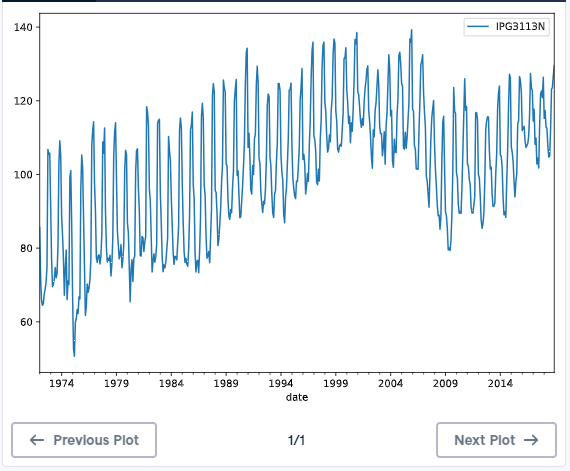</p>

Train-test splits
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

Instructions
100 XP
Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.
Make a pyplot axes using the subplots() function.
Use the DataFrame's .plot() method to plot the train and test sets on the axis ax.

In [ ]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

<p>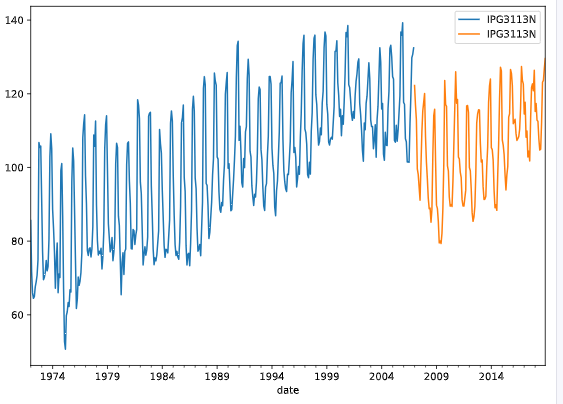</p>

<h2>How to test if a time series is stationary?</h2>
<p>Dickey Fuller Test</p>
<p>from statsmodels.tsa.stattools import adfuller</p>
<p>results = adfuller(df['close'])</p>
<p>result object is a tuple: 0th element is the test statistic: -1.34</p>
<p>- the more negative, the more likely to be stationary</p>
<p>- 1st element is p-value: .60</p>
<p>- if p-value is small(&lt;.05), reject null hypothesis, conclude time series must be stationary</p>
<p>&nbsp;</p>
<p>To make a time series stationary, take the difference</p>
<p>df_stationary = df.diff().dropna() #remove na created by diff()</p>
<p>Could also take difference by log, sq rt, or proportional change</p>

Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

In [ ]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])


##############

# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

##################

# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])


#Amazing! A p-value of 0.000000016 is very significant! This time series is now stationary and ready for modeling!


<p>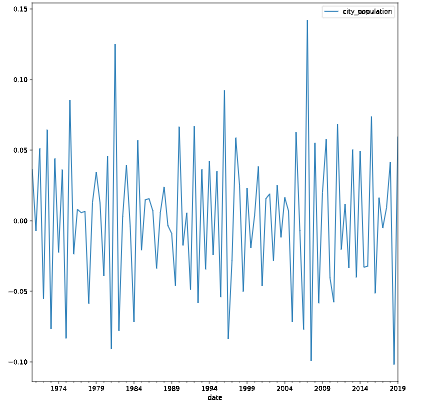</p>

<p>AR: Auto Regressive</p>
<p>- Regress values of the time series against previous values of the same time series</p>
<p>MA: Moving Average</p>
<p>- Regress values of the time series against previous error terms of the same time series</p>

Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

Instructions
100 XP
Import the ARIMA model class from the statsmodels.tsa.arima.model submodule.
Create a model object, passing it the time series y and the model order (1,0,1). Assign this to the variable model.
Use the model's .fit() method to fit to the data.

In [ ]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1,0,1))

# Fit the model
results = model.fit()

#see results
results = print(model.summary())

<h2>Creating a model</h2>
<p>from statsmodels.tsa.arima.model import ARIMA</p>
<p>#this is an ARMA(p,q) model</p>
<p>model = ARIMA(timeseries, order=(p,0,q))</p>
<p>print(results.summary())</p>
<p>&nbsp;</p>
<p>ARMAX: Arima with Linear Regression</p>

<h2>Forecasting:</h2>
<p>Starting from an arima fited results object, can make a prediction</p>
<p>results = model.fit()</p>
<p>#make predictions for last 25 entries of the training data</p>
<p>forecast = results.get_prediction(start=-25)</p>
<p>#forecast mean</p>
<p>mean_forecast = forecast.predicted_mean</p>
<p>#get confidence intervals of forecasts</p>
<p>confidence_intervals = forecast.conf_int()</p>
<p>#to make dynamic forecasts(predict 1 step ahead, use predicted value to forcast after that)</p>
<p>forecast = results.get_prediction(start=-25, dynamic = True)</p>
<p>#everything else stays the same</p>
<p>#forecast mean</p>
<p>mean_forecast = forecast.predicted_mean</p>
<p>#get confidence intervals of forecasts</p>
<p>confidence_intervals = forecast.conf_int()</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<h2>Use our model to predict the future</h2>
<p>forecast = results.get_forecast(steps=20)</p>
<p>#everything else stays the same</p>
<p>#forecast mean</p>
<p>mean_forecast = forecast.predicted_mean</p>
<p>#get confidence intervals of forecasts</p>
<p>confidence_intervals = forecast.conf_int()</p>

<p>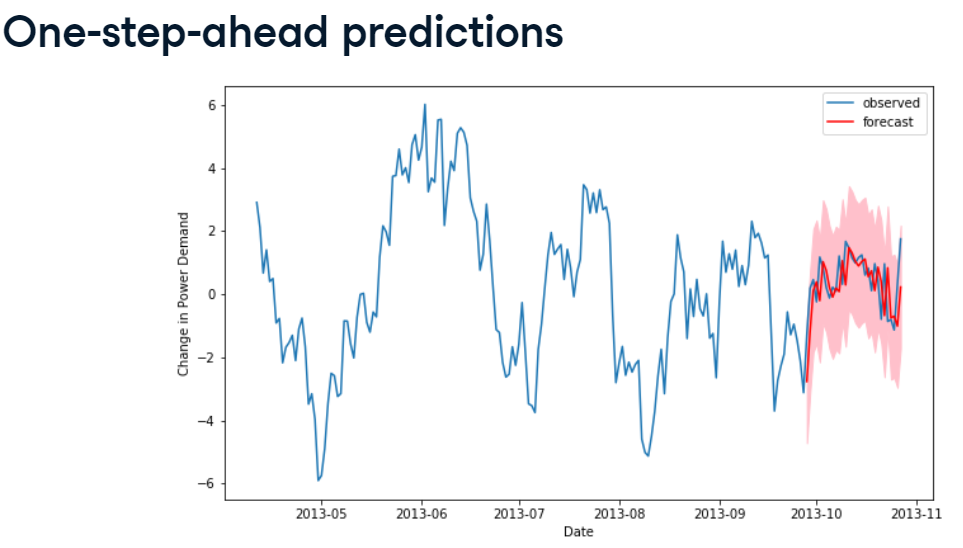</p>
<p>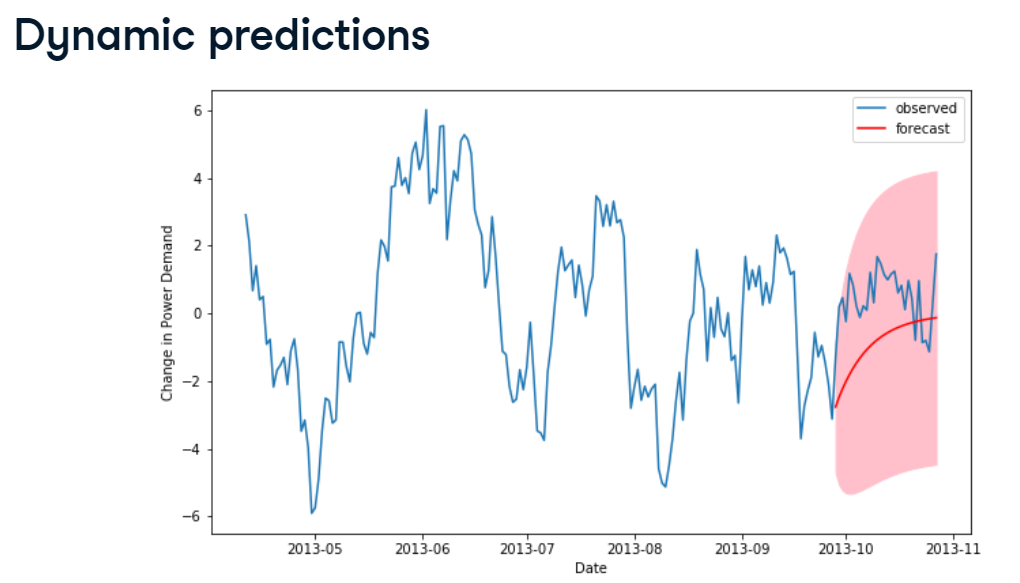</p>
<p>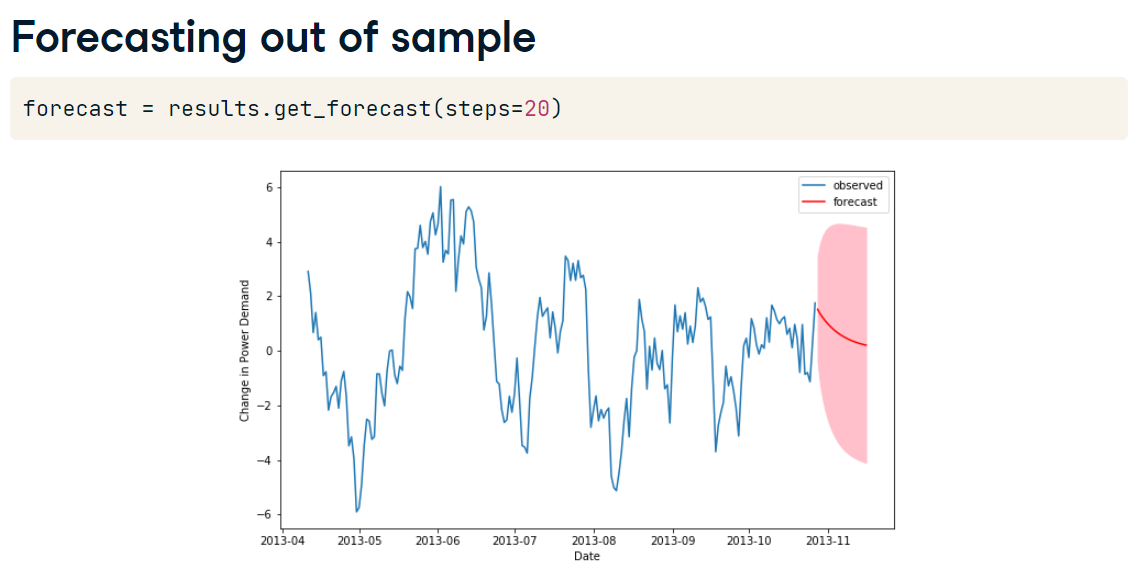</p>
<p>&nbsp;</p>

<h2>Generating one-step-ahead predictions</h2>
<p>It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing. Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway. In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions. A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results. Instructions 100 XP Use the results object to make one-step-ahead predictions over the latest 30 days of data and assign the result to one_step_forecast. Assign your mean predictions to mean_forecast using one of the attributes of the one_step_forecast object. Extract the confidence intervals of your predictions from the one_step_forecast object and assign them to confidence_intervals. Print your mean predictions.</p>

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

<h2>Plotting one-step-ahead predictions</h2>
<p>Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done. You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer. The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment. Instructions 100 XP Plot the amazon data, using the amazon.index as the x coordinates. Plot the mean_forecast prediction similarly, using mean_forecast.index as the x-coordinates. Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of lower_limits as the x coordinates.</p>

In [ ]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index,lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

<p></p>

<h2>Plotting dynamic forecasts</h2>
<p>Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were. The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment. Instructions 100 XP Plot the amazon data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates. Plot the mean_forecast predictions similarly. Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of one of these DataFrames as the x coordinates.</p>

In [ ]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

<p>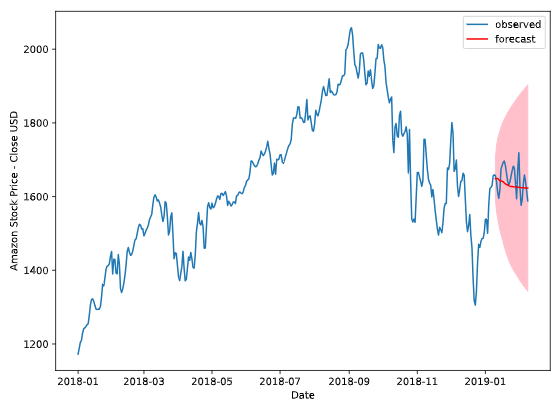</p>

<h2>Intro to ARIMA models</h2>
<p>If we take a differenced dataset and forecast, that forecast is based on the differenced dataset. We will need to convert it back to the original dataset by performing the cumulative sum</p>
<p>diff_forecast = results.get_forecast(steps=10).predicted_mean</p>
<p>from numpy import cumsum</p>
<p>mean_forecast = cumsum(diff_forecast) + df.iloc[-1,0]</p>

<p>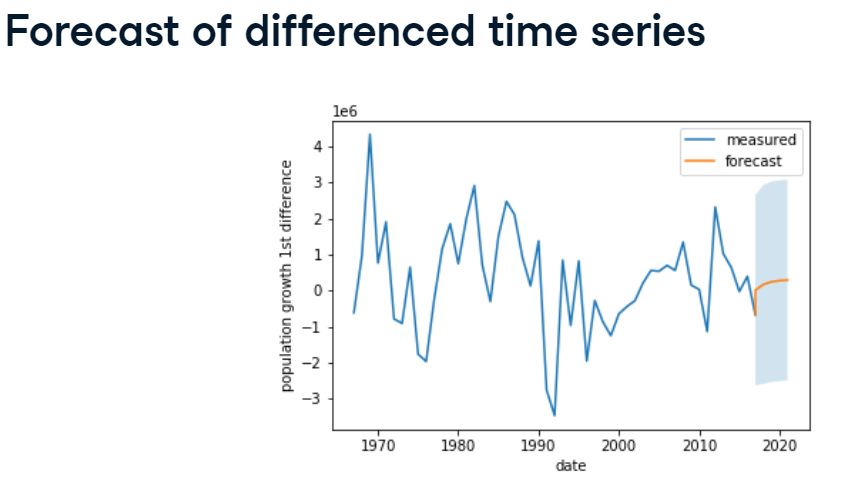</p>
<p>&nbsp;</p>
<p>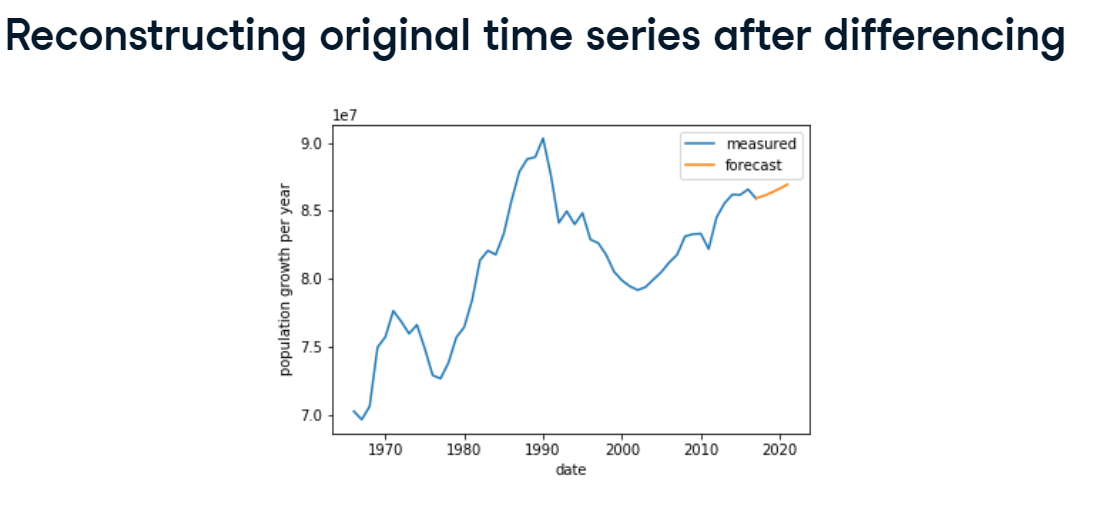</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<h2>Differencing and fitting ARMA</h2>
<p>In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model. In the next section you'll make a forecast of the differences and use this to forecast the actual values. The Amazon stock time series is available in your environment as amazon. The ARIMA model class is also available in your environment. Instructions 100 XP Use the .diff() method of amazon to make the time series stationary by taking the first difference. Don't forget to drop the NaN values using the .dropna() method. Create an ARMA(2,2) model using the ARIMA class, passing it the stationary data. Fit the model.</p>

In [ ]:
# Take the first difference of the data
amazon_diff = amazon['close'].diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

<h2>Unrolling ARMA forecast</h2>
<p>Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key. The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available. Instructions 100 XP Use the .get_forecast() method of the arima_results object and select the predicted mean of the next 10 differences. Use the np.cumsum() function to integrate your difference forecast. Add the last value of the original DataFrame to make your forecast an absolute value.</p>

In [ ]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

<h2>Fitting an ARIMA model</h2>
<p>In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you. You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model. A subset of the stocks dataset is available in your environment as amazon and so is the ARIMA model class. Instructions 100 XP Create an ARIMA(2,1,2) model, using the ARIMA class, passing it the Amazon stocks data amazon. Fit the model. Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to arima_value_forecast.</p>

In [ ]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

<h2>Intro to ACF and PACF</h2>
<p>How do we choose which ARIMA model to fit?</p>
<p>- Model order is important to the quality of the forecast</p>
<p>- Different orders are shown below, which shows the mean forecast</p>
<p>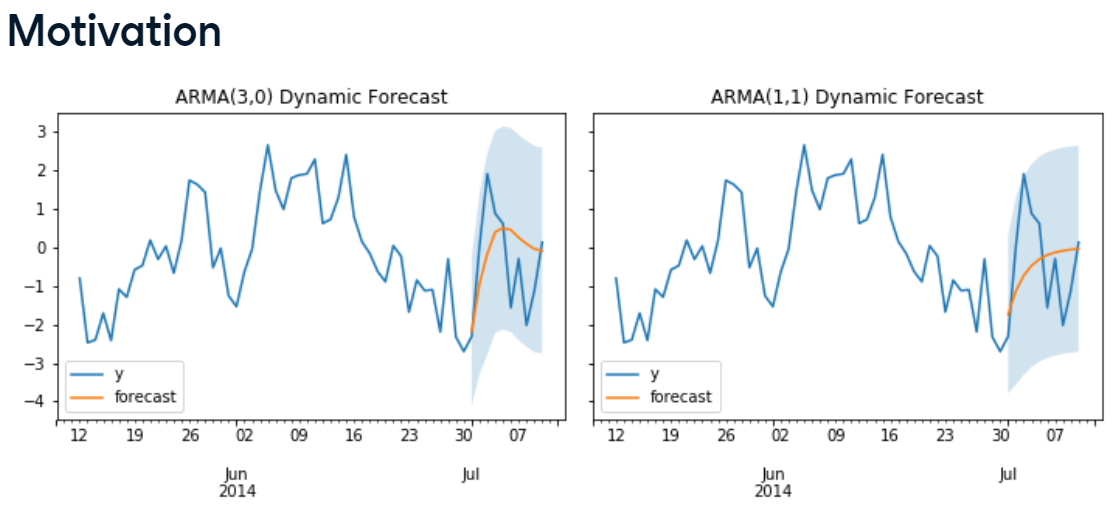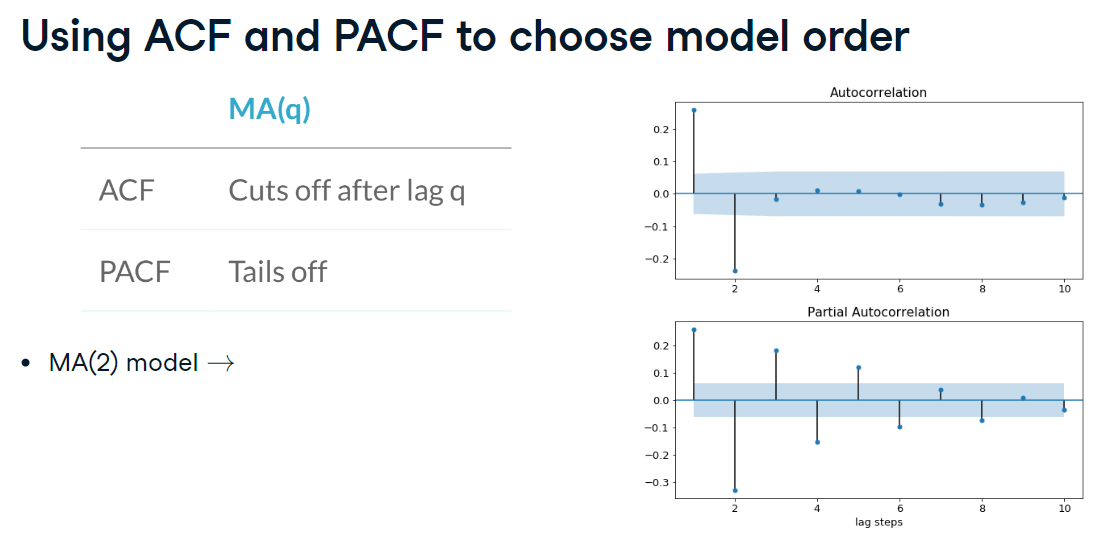</p>
<p>&nbsp;</p>
<p>To determine the model order, can use the ACF and PACF</p>
<p>AutoCorrelation and Partial Auto Correlation</p>
<p>AutoCorrelation: Set of correlations for different lags</p>
<p>Lag-1 Autocorrelation: correlation between time series and time series lagged by 1</p>
<p>Can plot ACF for each lag</p>
<p>- If values are small and lie within blue shaded region, then not statistically significant</p>
<p>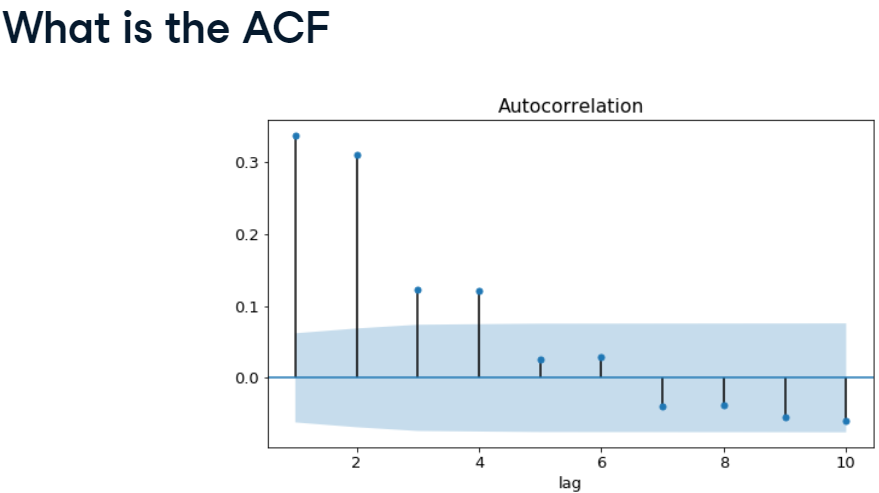</p>
<p>Partial AutoCorrelation: Correlation of particular subset lag</p>
<p></p>
<p>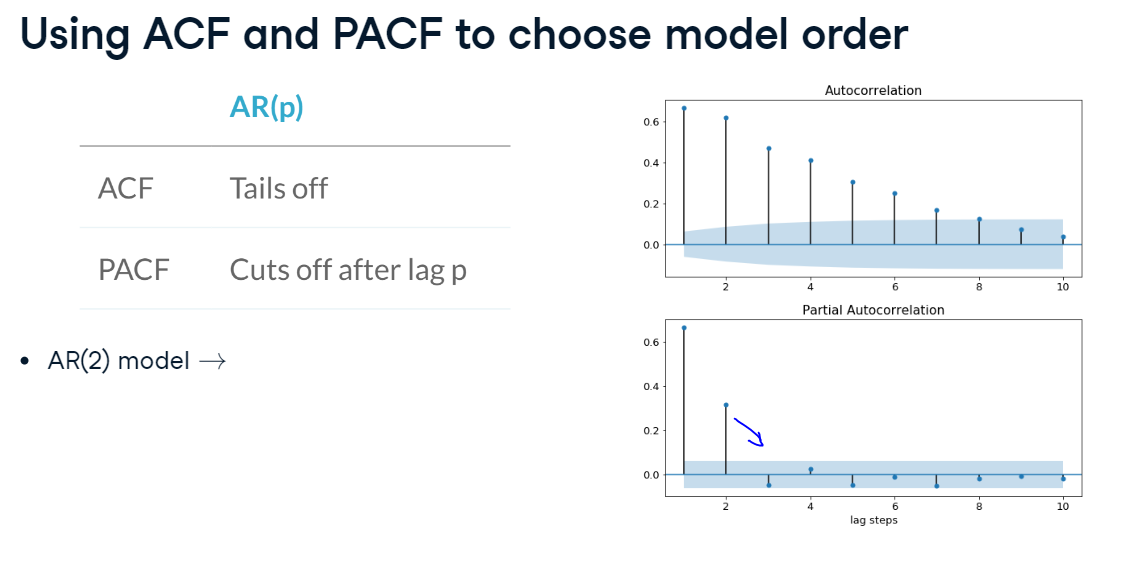</p>
<p>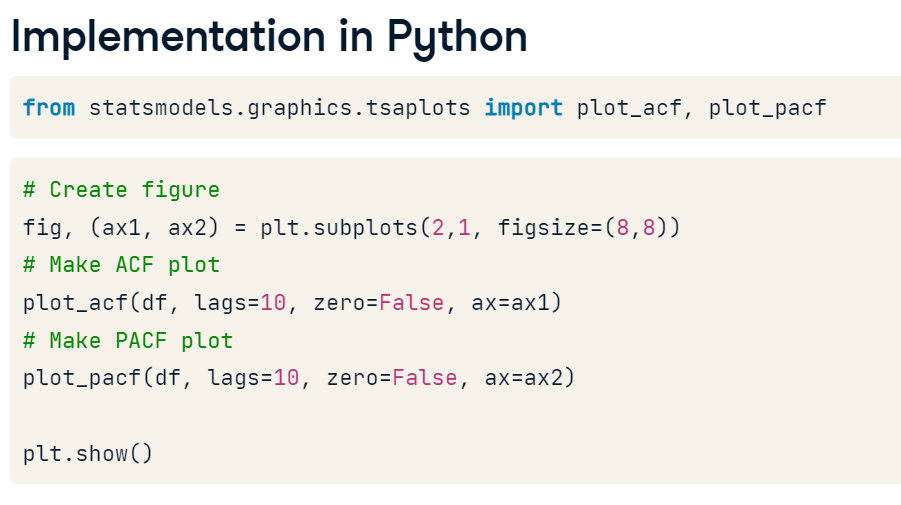</p>
<p>&nbsp;</p>
<h2>This is a sign that the data is non-stationary</h2>
<p>- Needs to be differenced</p>
<p>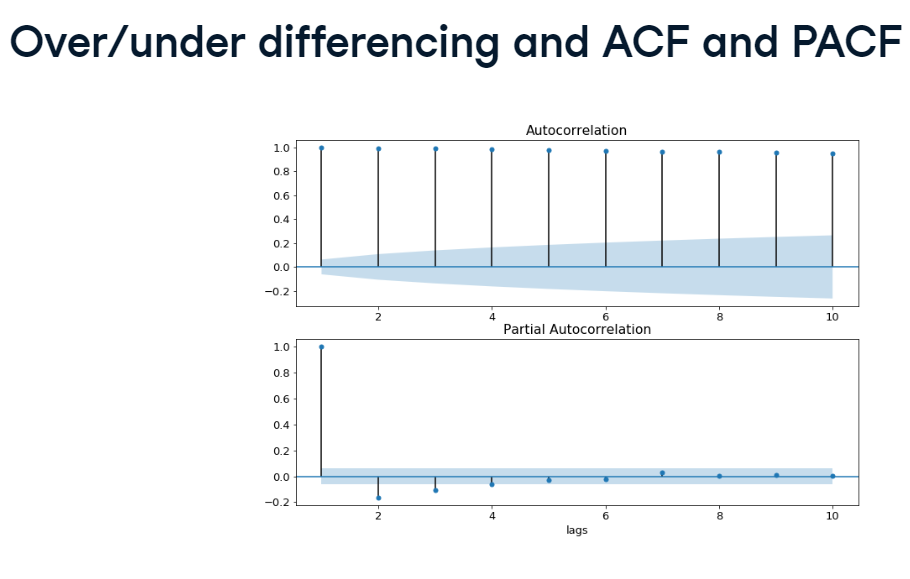</p>
<h2>This is a sign that we have taken the difference too many times</h2>
<p>&nbsp;</p>
<p></p>

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = ARIMA(earthquake, order=(1,0,0))

# Train model
results = model.fit()

<p>based on the graph, tails off after AR(1)</p>
<p>&nbsp;</p>
<p>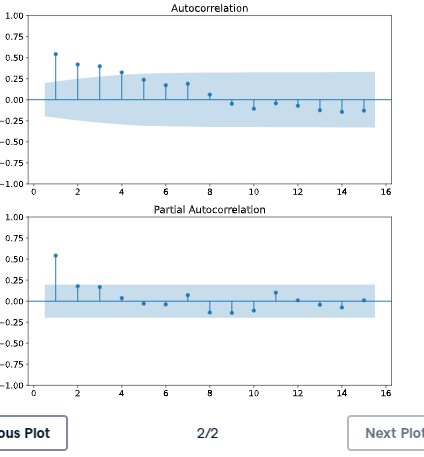</p>

<p>&nbsp;</p>
<p>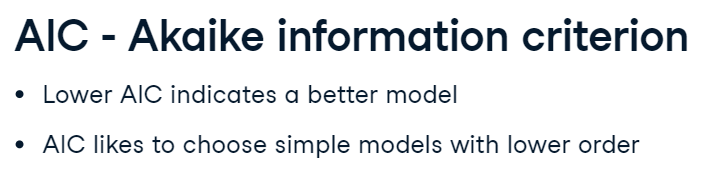</p>
<p>&nbsp;</p>
<p>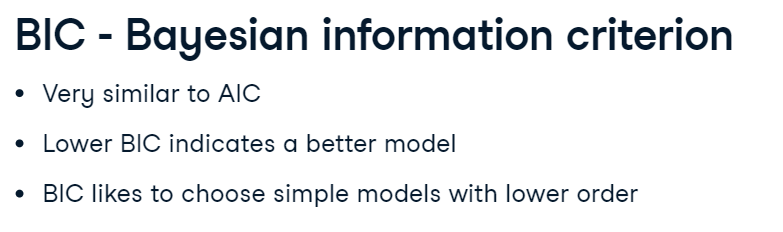</p>
<p>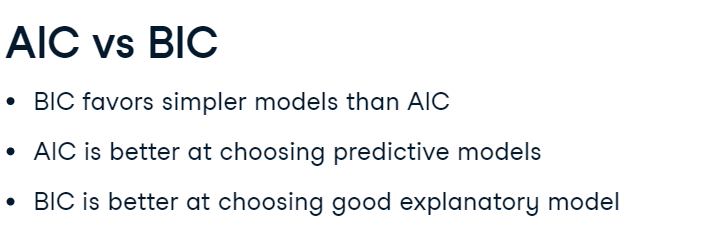</p>
<p>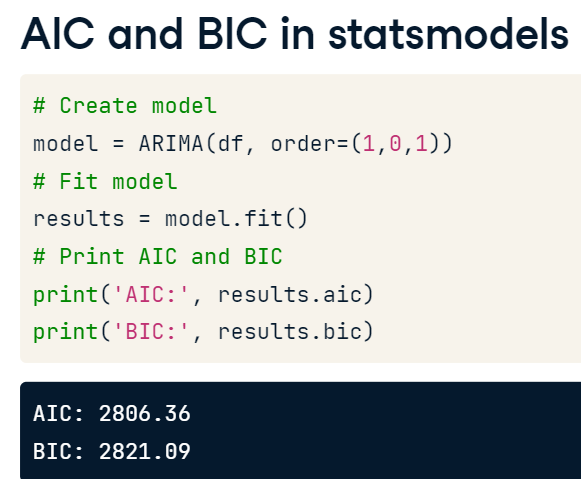</p>
<p>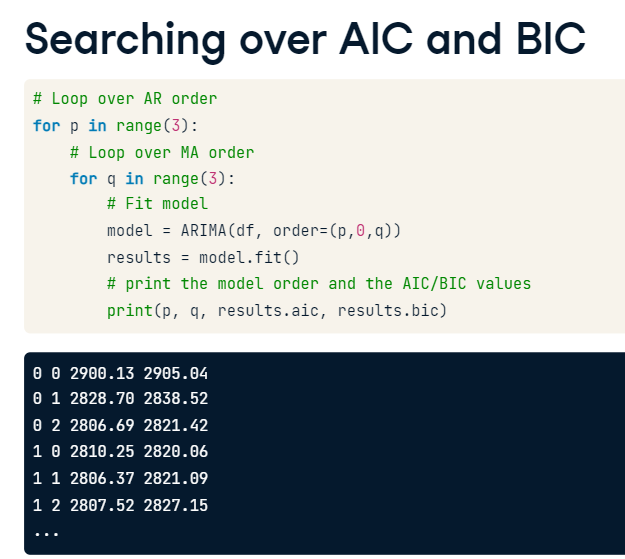</p>
<p>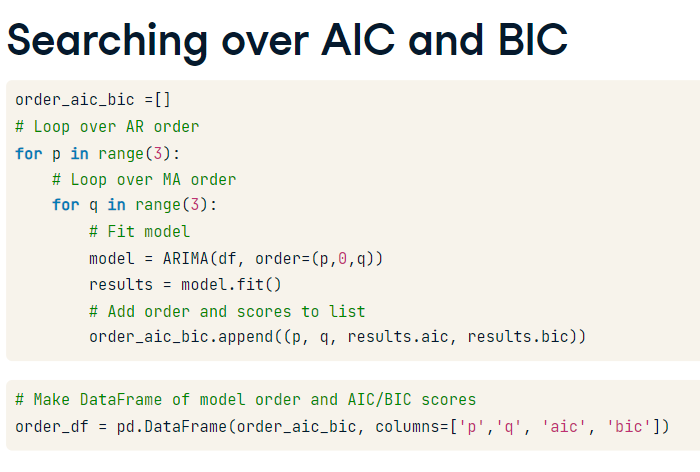</p>

<h2>Model Diagnostics: How to determine whether a model is good or not?</h2>
<p>focus on the residuals:Should look like white noise</p>
<p></p>
<p>&nbsp;</p>
<p></p>
<h2>MAE - Mean Absolute Error: Mean difference between your predictions and true values</h2>
<h2>- Would like to know, on average, how large the residuals are</h2>
<p>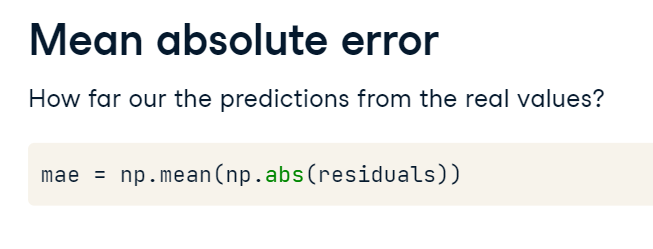</p>
<p>Standardized Residuals: Should be no obvious structure for it to be white noise</p>
<p>Histogram: If our model is good, green and orange line should be similar</p>
<p>Normal Q-Q Plot: if residuals are nomally distributed, dots should be all on the line</p>
<p>Correlogram: 95% for lag greaer than 0, should not be significant correlation. I.e, correlations should be wihin blue line after lag 0</p>
<p>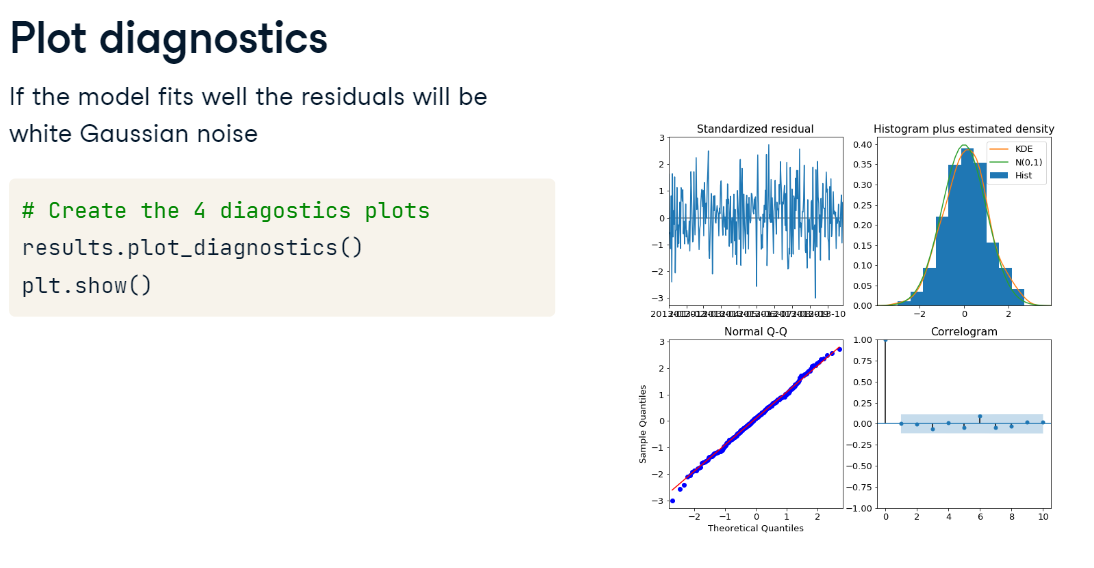</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<h2>Mean absolute error</h2>
<p>Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values. In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series numpy has been imported into your environment as np and the earthquakes time series is available for you as earthquake. Instructions 100 XP Use np functions to calculate the Mean Absolute Error (MAE) of the .resid attribute of the results object. Print the MAE. Use the DataFrame's .plot() method with no arguments to plot the earthquake time series.</p>

In [ ]:
# Fit model
model = ARIMA(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

<p>Great! Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.</p>
<p>&nbsp;</p>
<p>MAE = 4.568988294963051</p>

<p></p>

<h1>Ljung-Box Test: Check to see if the autocorrelations in the residuals are small.</h1>
<p>- must be less than .05 to be no correlated</p>

<p></p>
<p>&nbsp;</p>
<p>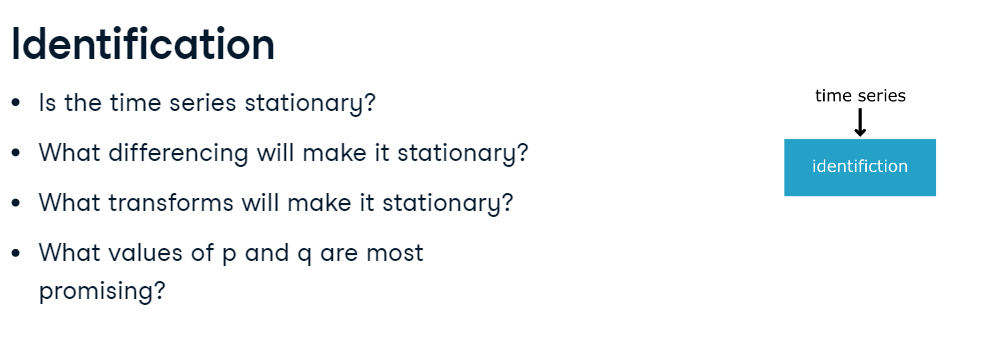</p>
<p>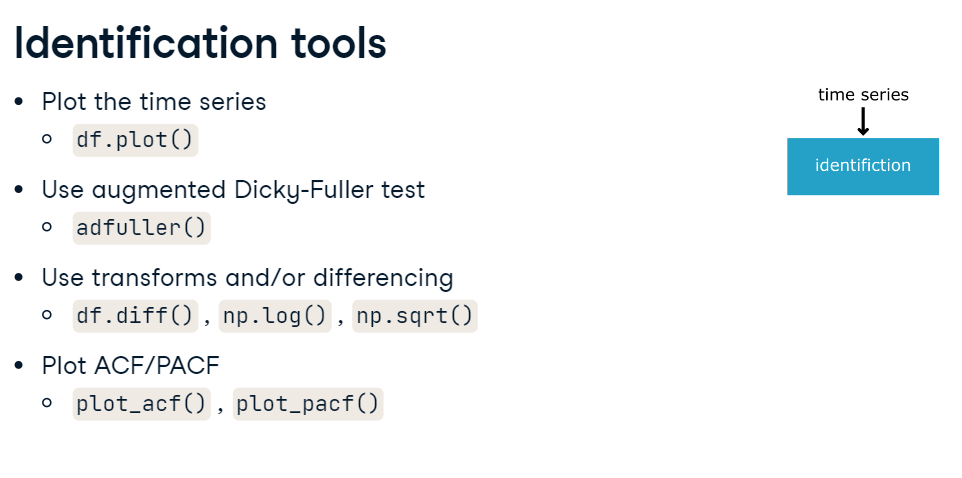</p>
<p>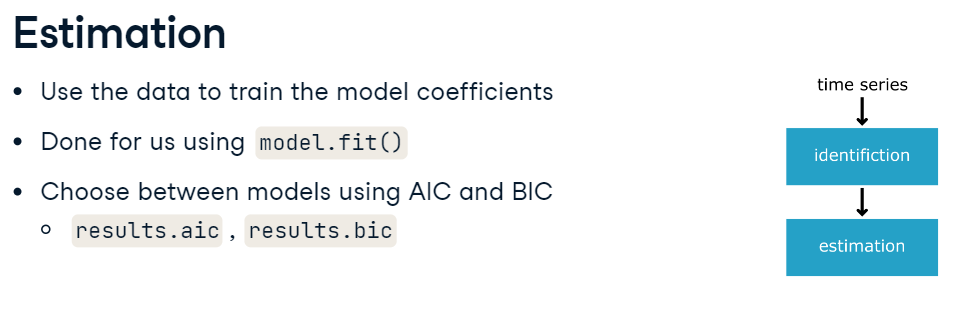</p>
<p>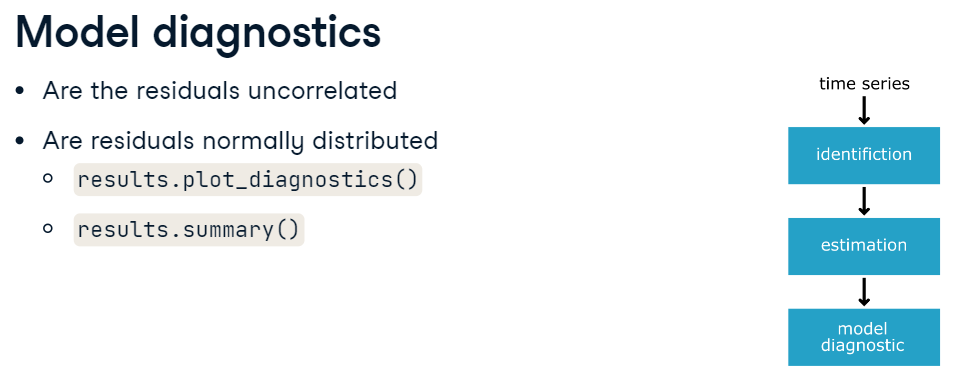</p>
<p>&nbsp;</p>
<p>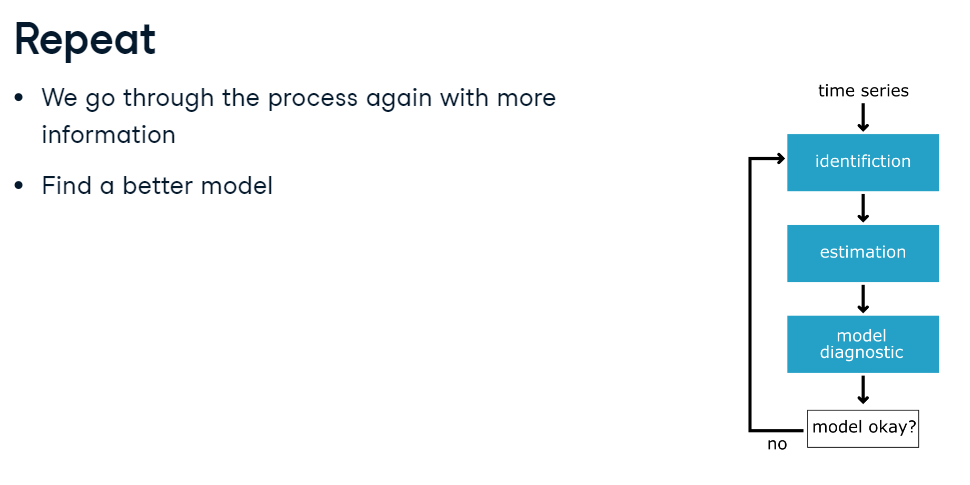</p>
<p>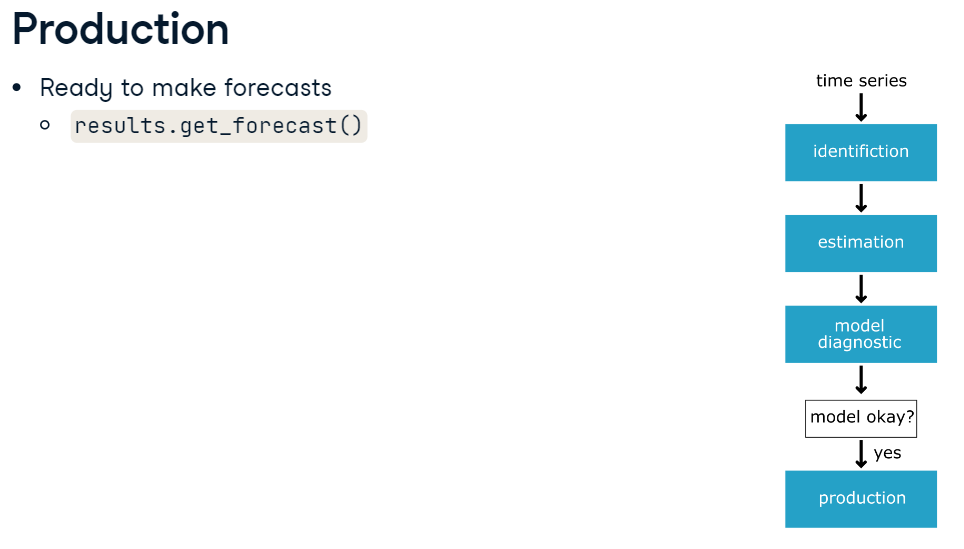</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<h2>Identification</h2>
<p>In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts. You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US. The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary. The time series has been loaded in as a DataFrame savings and the adfuller() function has been imported. Instructions 100 XP Plot the time series using the DataFrame's .plot() method. Apply the Dicky-Fuller test to the 'savings' column of the savings DataFrame and assign the test outcome to result. Print the Dicky-Fuller test statistics and the associated p-value.</p>

In [ ]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

    -3.185899096242141
    0.020815541644114092 #stationary as p value is less than .05

<p>&nbsp;</p>
<h2>To decompose the data, need to know how often the cycles repeat (yearly =12)</h2>
<p>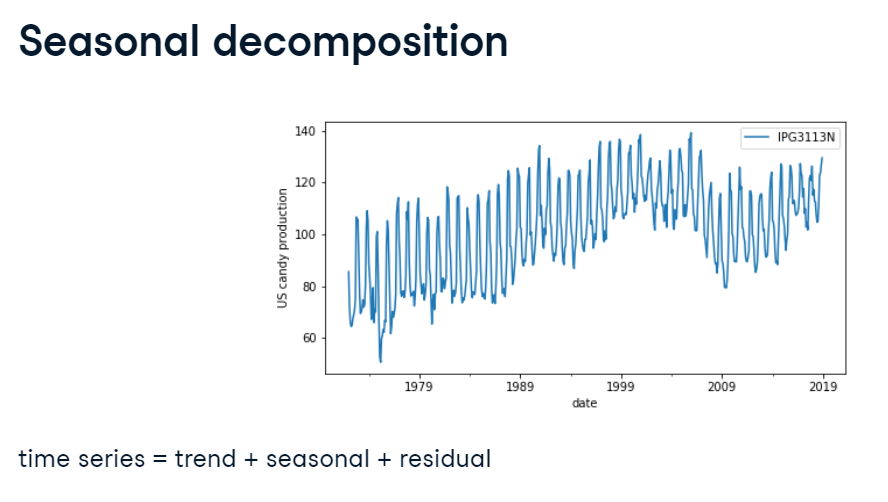</p>
<p>&nbsp;</p>
<p>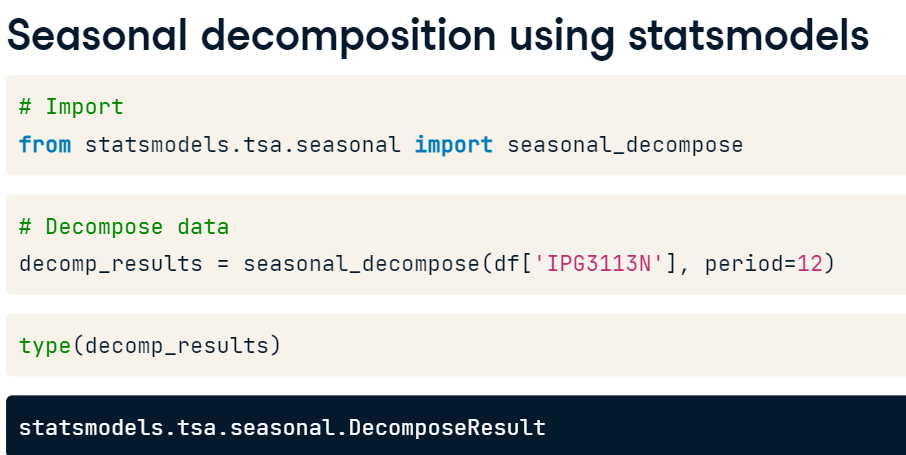</p>
<p>&nbsp;</p>
<p>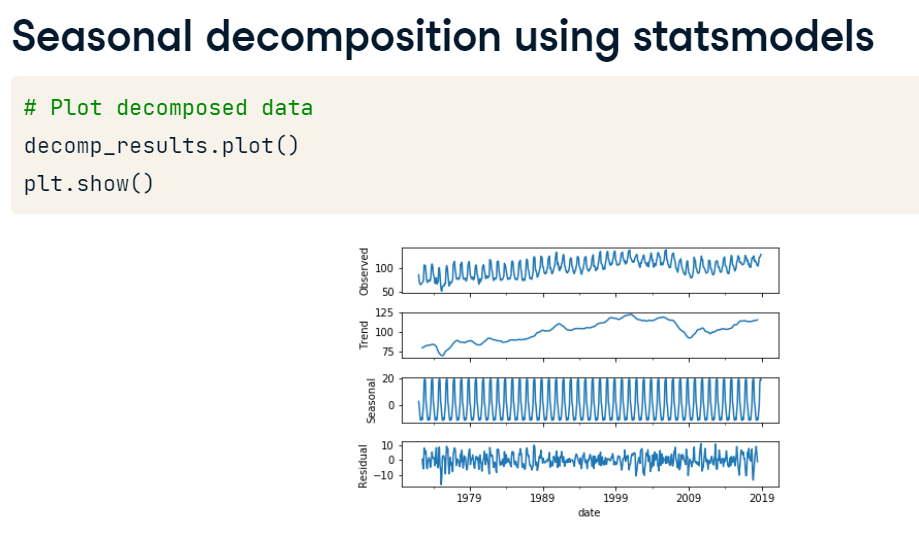</p>
<p>Can see peak a 12 lags</p>
<p>&nbsp;</p>
<p>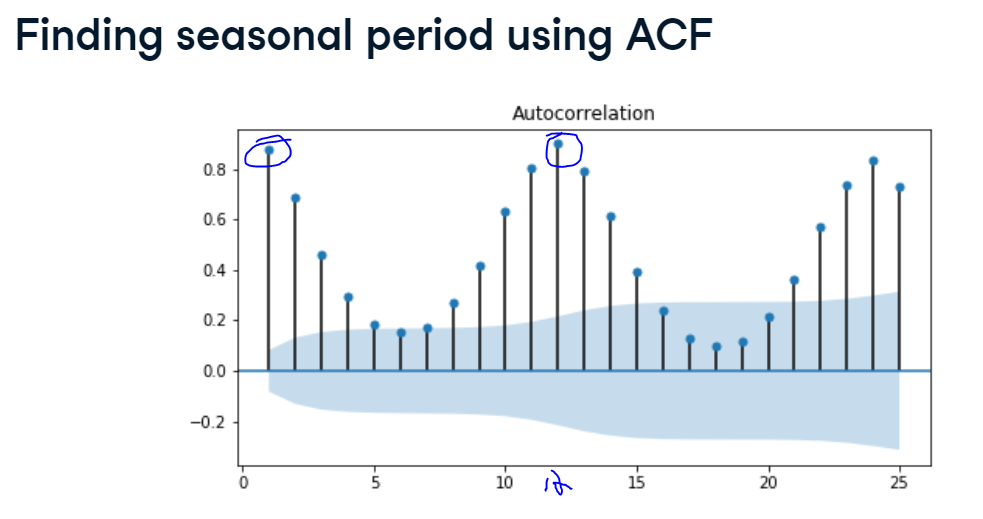</p>
<p>&nbsp;</p>
<h2>Sometimes it can be hard to tell by eye to determine whether a time series is seasonal or not</h2>
<p>ACF is useful here. Since time series is not stationary, ACF plot will be much clearer if we de-trend it first</p>
<p>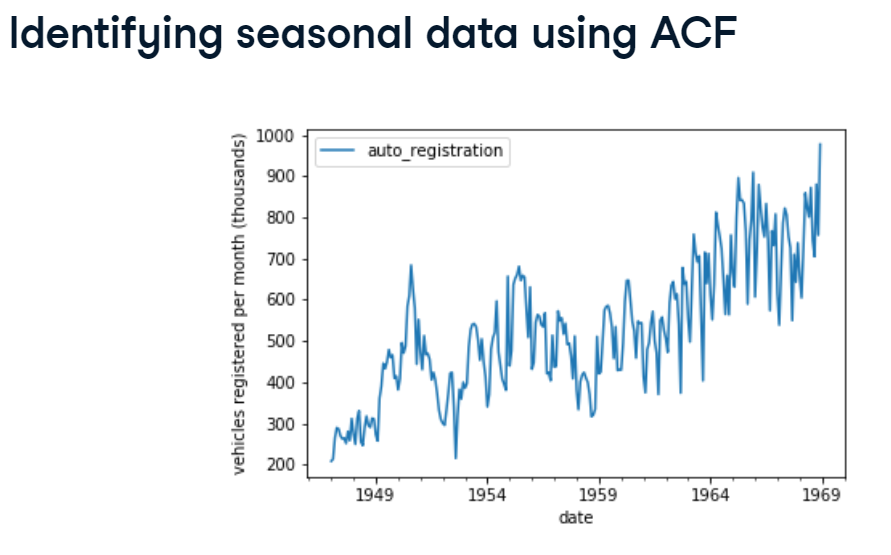</p>
<p>&nbsp;</p>
<p>Trying to find the period of the time series</p>
<p>&nbsp;</p>
<p>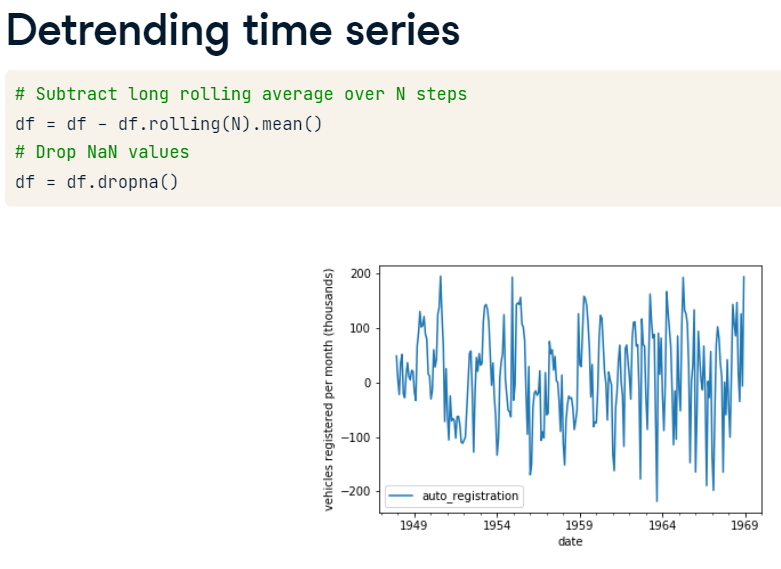</p>
<p>&nbsp;</p>

<h2>Seasonal decompose</h2>
<p>You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components. In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case. The milk production time series has been loaded in to the DataFrame milk_production and is available in your environment. Instructions 100 XP Import the seasonal_decompose() function from statsmodels.tsa.seasonal. Decompose the 'pounds_per_cow' column of milk_production using an additive model and period of 12 months. Plot the decomposition.</p>

In [ ]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

<p>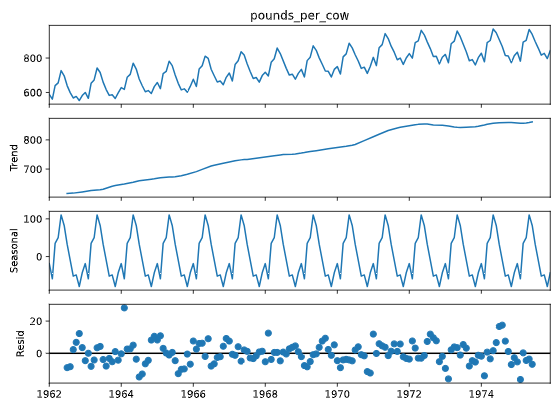</p>

<p>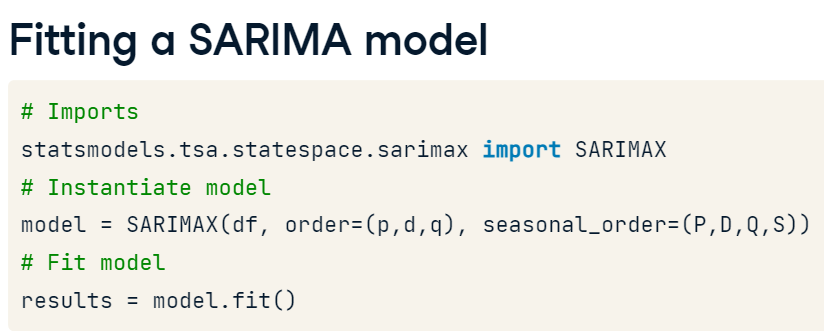</p>
<p>&nbsp;</p>
<p>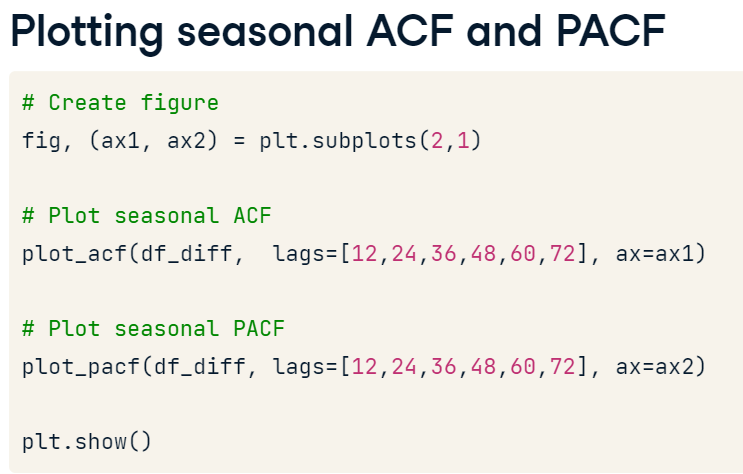</p>

<h2>SARIMA vs ARIMA forecasts</h2>
<p>In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series. Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1) , have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC. In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test. The fitted ARIMA results object and the fitted results object are available in your environment as arima_results and sarima_results. Instructions 100 XP Create a forecast object, called arima_pred, for the ARIMA model to forecast the next 25 steps after the end of the training data. Extract the forecast .predicted_mean attribute from arima_pred and assign it to arima_mean. Repeat the above two steps for the SARIMA model. Plot the SARIMA and ARIMA forecasts and the held out data wisconsin_test.</p>
<p>&nbsp;</p>
<p>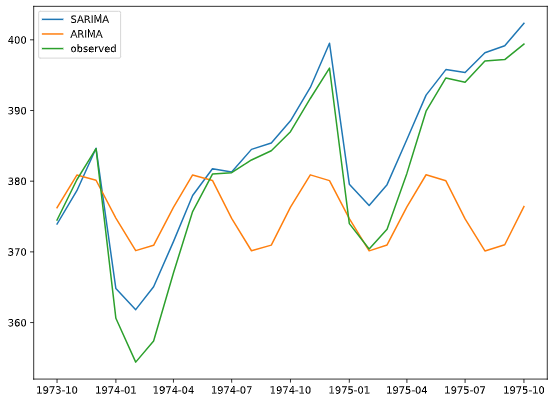</p>
<p>&nbsp;</p>
<p><span style="color: #ffffff; font-family: Studio-Feixen-Sans, Arial, sans-serif; font-size: 14px; text-align: center; background-color: rgba(5, 25, 45, 0.95);">Fantastic job! You can see that the SARIMA model has forecast the upward trend and the seasonal cycle, whilst the ARIMA model has only forecast the upward trend with an added wiggle. This makes the SARIMA forecast much closer to the truth for this seasonal data!</span></p>

In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

<p>Automation: Loops over model orders to find the best one</p>
<p>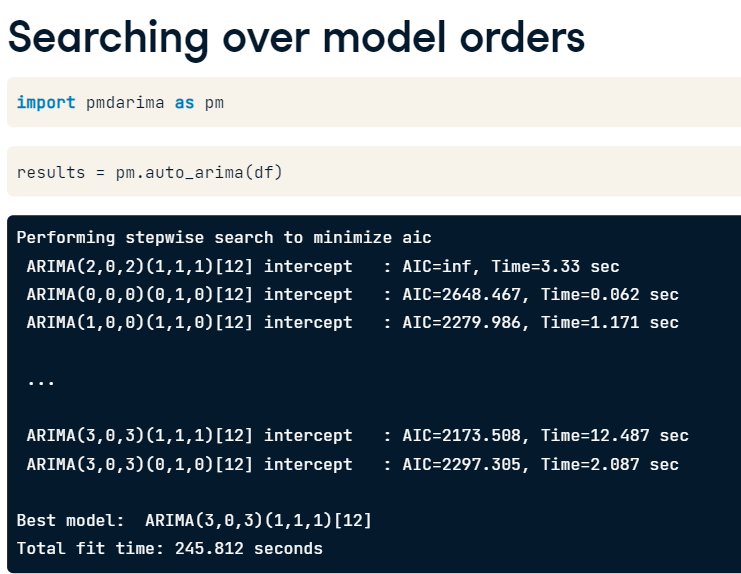</p>
<p>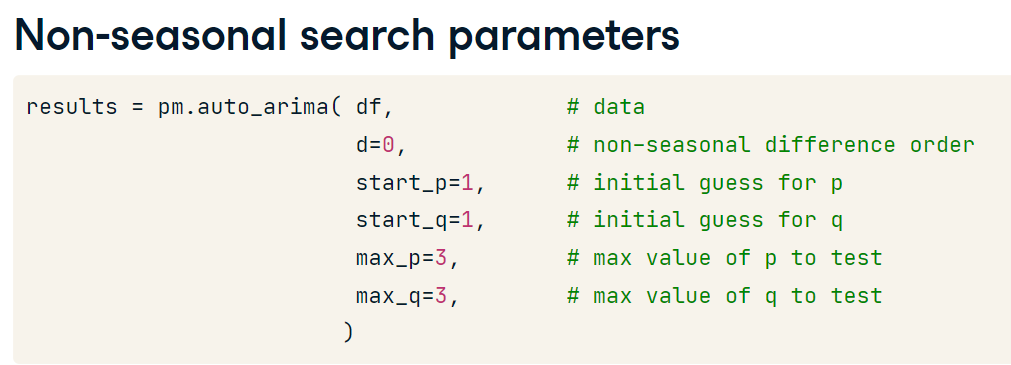</p>
<p>&nbsp;</p>
<p>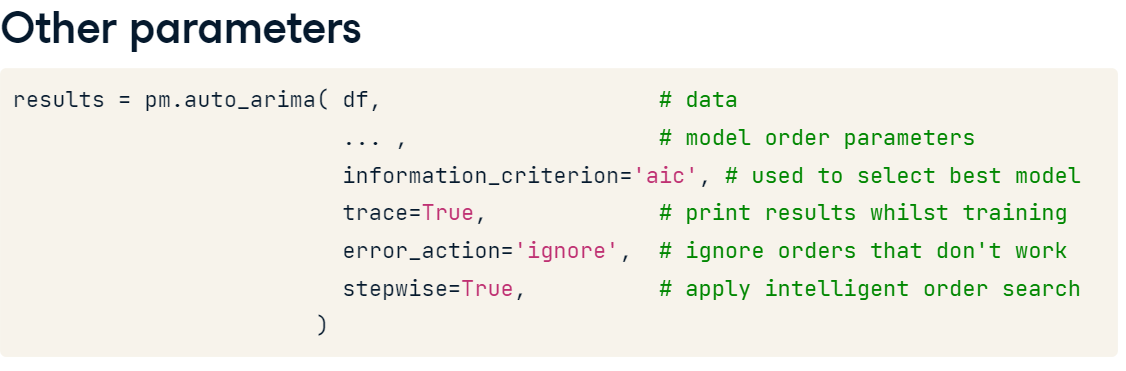</p>
<p>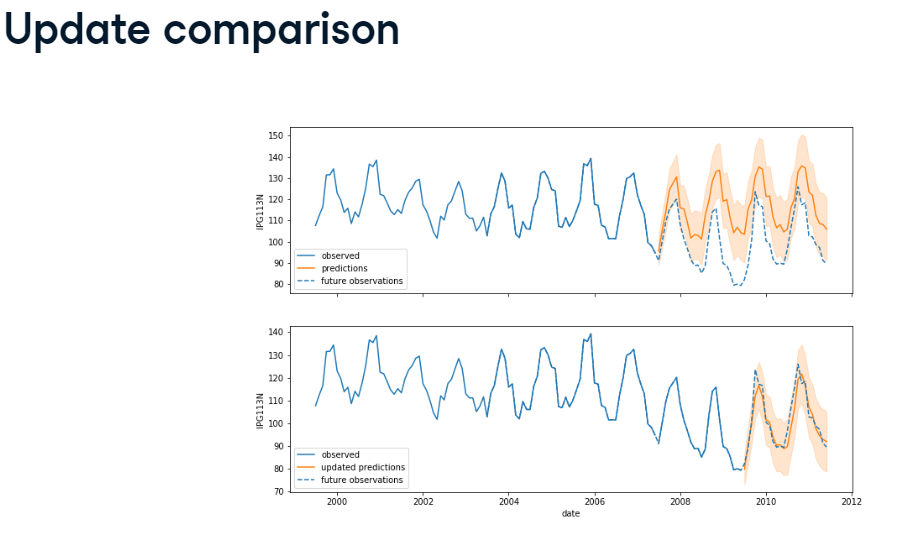</p>

<h2>SARIMA and Box-Jenkins</h2>
<p>Only step that will change is the identification step</p>
<p>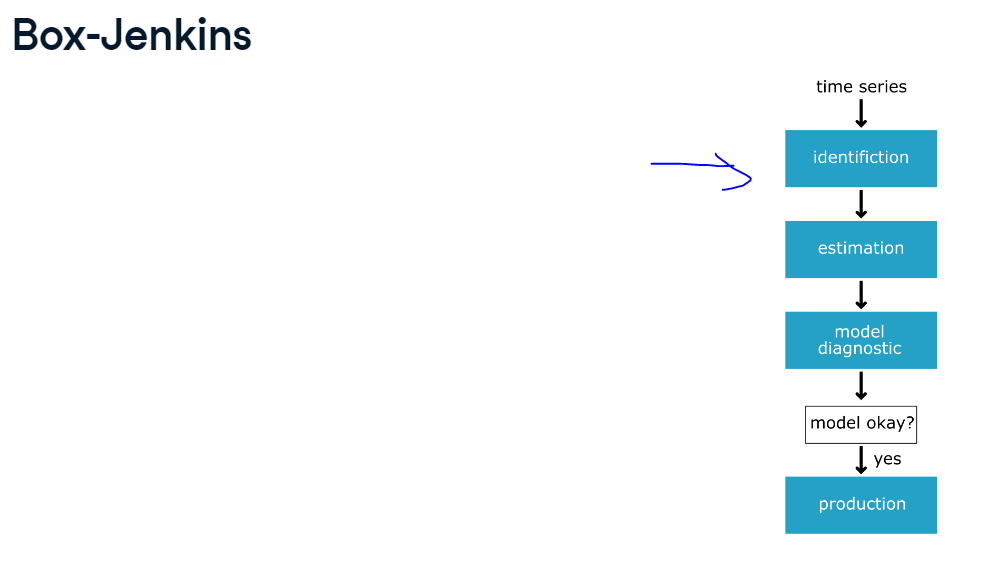</p>
<p>&nbsp;</p>
<p>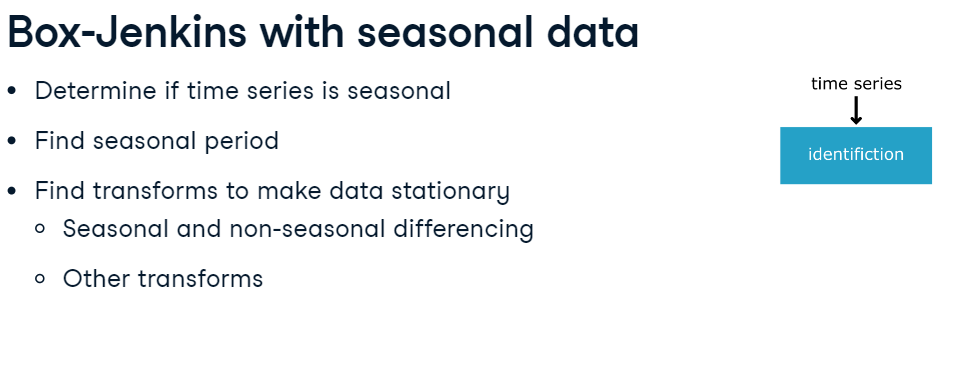</p>
<p>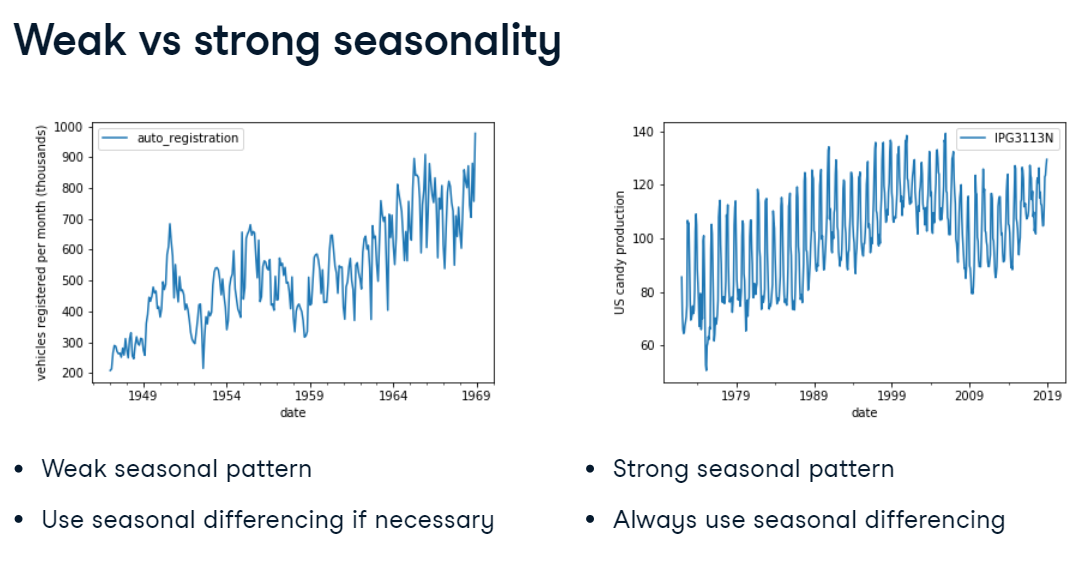</p>
<p>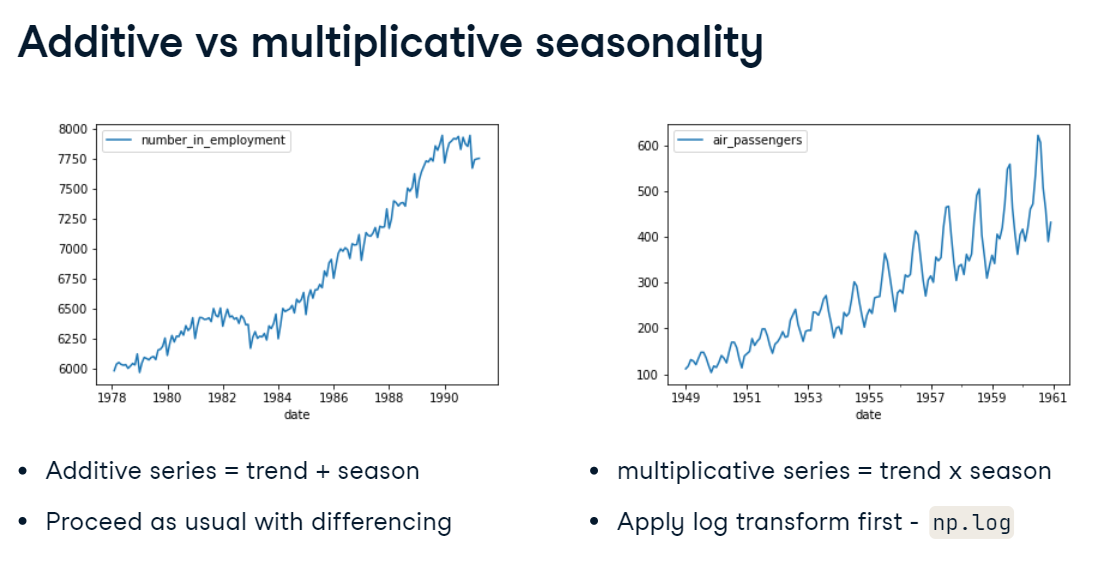</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<h2>SARIMA forecast</h2>
<p>In the previous exercise you confirmed that a SARIMA x model was a good fit to the CO time series by using diagnostic checking. Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO emissions or we will face major societal challenges. In this exercise, you will forecast the CO time series up to the year 2030 to find the CO levels if we continue emitting as usual. The trained model results object is available in your environment as results. Instructions 1/3 35 XP Create a forecast object for the next 136 steps - the number of months until Jan 2030. Assign the .predicted_mean of the forecast to the variable mean. Compute the confidence intervals and assign this DataFrame to the variable conf_int.</p>

In [ ]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index